In [1]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter

from pdbfixer import PDBFixer
from openmm.app import PDBFile

settings = Settings(name='testHOIP')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = True
settings.RW_do_params = False
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "HOIPapo_test"
import icecream as ic
# ic.disable()

/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name testHOIP already exists. Attempting to ch

In [2]:
# ### add code to read in sequence from CIF file instead of copying it manually

# cif_file = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/AF-Q96EP0-F1-model_v4.cif"

# sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
# sequence = ""
# seq_head_idx = 0
# with open(cif_file, 'r') as f:
#     lines = f.readlines()
#     for idx, line in enumerate(lines):
#         if sequence_header in line:
#             seq_head_idx = idx+1
#             break
    
#     for idx, line in enumerate(lines[seq_head_idx:]):
#         if idx > 0 and line[0] == ";":
#             break
#         sequence += line.strip()


# # print(sequence)



# # strip sequence of non letters
# sequence = ''.join([i for i in sequence if i.isalpha()])

# print(sequence)

# print("Sequence length: ", len(sequence))


# # convert sequence to FASTA format
# def write_fasta(sequence, header, file_name):
#     """
#     Writes a single-letter amino acid sequence to a FASTA file.
    
#     Parameters:
#     - sequence: A string containing the amino acid sequence.
#     - header: A string to be used as the header in the FASTA file.
#     - file_name: The name of the FASTA file to be created.
#     """
#     print(f"Writing sequence to {file_name}")
#     with open(file_name, 'w') as fasta_file:
#         # Write the header with the '>' symbol
#         fasta_file.write(f">{header}\n")
        
#         # Write the sequence in lines of 80 characters
#         for i in range(0, len(sequence), 80):
#             fasta_file.write(sequence[i:i+80] + "\n")


In [3]:

# fasta_path = os.path.join("raw_data", "HOIP", 'HOIP_apo.fasta')
# write_fasta(sequence, 'HOIPapo', fasta_path)



In [4]:
# raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_peptide.csv"
# raw_hdx = pd.read_csv(raw_hdx_path)
# raw_hdx.tail()

In [5]:
# # drop Unnamed: 0	

# raw_hdx = raw_hdx.drop(columns=['Unnamed: 0'])
# raw_hdx.head()


In [6]:
# # assign peptide number for each start and end residue using ngroup
# raw_hdx['peptide'] = raw_hdx.groupby(['Start','End']).ngroup()

# raw_hdx.head()

In [7]:

# times = [0, 0.5, 5.0]

# num_peptides = len(raw_hdx)//len(times)

# exposure = times * num_peptides

# raw_hdx['Exposure'] = exposure

# raw_hdx.head()

In [8]:
# raw_hdx['UptakeFraction'] = raw_hdx['Uptake'] / raw_hdx['MaxUptake']

# raw_hdx.head()

In [9]:
# # clamp UptakeFraction to 1
# raw_hdx['UptakeFraction'] = raw_hdx['UptakeFraction'].clip(upper=1)

In [10]:
# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(raw_hdx)



In [11]:

# # pivot exposure and uptake fraction
# grouped = raw_hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# # drop 
# grouped.head()


In [12]:

# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(grouped)

In [13]:
# # conver to HDXer format ie start, end, exposure_1, exposure_2 

# # change Start to ResStr and End to ResEnd
# hdx = grouped.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# # drop the exposure column
# hdx.columns.name = None

# print(hdx)


In [14]:

# hdx = hdx.round(5)
# hdx.to_csv(os.path.join("raw_data", "HOIP", 'HOIP_apo.dat'), sep=' ', index=False)


In [15]:
# segs = hdx[['ResStr', 'ResEnd']].drop_duplicates().sort_values(by=['ResStr', 'ResEnd']).reset_index(drop=True)


In [16]:

# # convert to list of tuples
# segs = [tuple(x) for x in segs.values]

# print(segs)


In [17]:


# # write list as new lines with space delimiter
# with open(os.path.join("raw_data", "HOIP", 'HOIP_APO_segs.txt'), 'w') as f:
#     for item in segs:
#         f.write("%s\n" % ' '.join(map(str, item)))

In [18]:
# ### at the moment PDB fixer is adding different number of hydrogens to different structures... Need to change the code to use PROPKA to get H states and apply to all strucutres
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/"
# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     continue
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



# top_path = os.path.join(H_sim_dir, pdb_list[0])
# pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

# print(top_path)
# print(pdb_paths)


# small_traj_name = top_path.replace(".pdb","_small.xtc")
# small_traj_path = os.path.join(H_sim_dir, small_traj_name)

# u = mda.Universe(top_path)
    
# with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
#     for ts in u.trajectory:
#         W.write(u.atoms)
#         W.write(u.atoms)
#         break


Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [19]:
def pre_process_main():
    # BPTI data
    # BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HOIP/HOIP_apo/"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    sim_name = 'HOIP_apo_AF'
    os.listdir(BPTI_dir)

    segs_name = "HOIP_APO_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "HOIP_apo.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(H_sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)
        break
    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = "/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_protonated.pdb"
    # pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    # print(top_path)
    # print(pdb_paths)


    # small_traj_name = top_path.replace(".pdb","_small.xtc")
    # small_traj_path = os.path.join(sim_dir, small_traj_name)

    # u = mda.Universe(top_path)
        
    # with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    #     for ts in u.trajectory:
    #         W.write(u.atoms)
    #         W.write(u.atoms)
    #         break
    # # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_protonated.xtc"]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [20]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo.dat
['HOIPapo_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb', 'HOIPapo_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb', 'HOIPapo_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb', 'HOIPapo_unrelaxed_rank_003_alphafold2_ptm_model_4_seed_000.pdb', 'HOIPapo_unrelaxed_rank_004_alphafold2_ptm_model_5_seed_000.pdb']
['/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_protonated.xtc']


In [21]:
# ic.disable()
combined_analysis_dump, names, save_paths = VDX.run_benchmark_ensemble(system=test_name,
                                                                    times=[0, 0.5, 5.0],
                                                                    expt_name=expt_name,
                                                                    n_reps=1,
                                                                    RW=True,
                                                                    optimise=False,
                                                                    split_modes=['r','s','R3'],
                                                                    hdx_path=hdx_path,
                                                                    segs_path=segs_path,
                                                                    traj_paths=traj_paths,
                                                                    top_path=top_path)

(2, 6)
Running benchmark for testHOIP
Running r split mode
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.p

Experiment name testHOIP_r_naive_random already exists. Attempting to change name to testHOIP_r_naive_random0
Experiment name testHOIP_r_naive_random already exists. Attempting to change name to testHOIP_r_naive_random1
Experiment name testHOIP_r_naive_random already exists. Attempting to change name to testHOIP_r_naive_random2
Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo.dat
AVG: ncol = 5, len(names) = 3
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP...  Experimental   
1                                                NaN  HOIPapo_test   

  experimental                                                top  \
0        False                                                NaN   
1          NaN  /

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random2/train_HOIPapo_test_1/reweighting_gamma_3x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Sum of Output Weights
1.0
Finished reweighting
[(array([3.62058298e-03, 3.37031312e-07, 1.16578399e-02, 1.03594729e-06,
       3.88717214e-07, 1.17685626e-04, 3.24274620e-13, 2.56874105e-08,
       3.71292560e-04, 8.63193604e-12, 2.05634162e-03, 8.05659690e-08,
       8.62092298e-03, 4.39973437e-03, 5.14379334e-04, 4.40945077e-10,
       4.71131151e-03, 2.12671513e-03, 3.28229090e-03, 3.17231087e-04,
       1.96516741e-03, 4.23858248e-03, 1.57290022e-02, 3.67697976e-03,
       5.14368355e-03, 2.31728282e-02, 9.72780275e-03, 7.38597084e-04,
       2.05048496e-04, 3.92350141e-03, 9.06744741e-05, 3.24772171e-04,
       1.08282539e-03, 1.65095735e-04, 6.63869898e-03, 6.74649582e-02,
       6.29892567e-04, 9.55274628e-03, 1.24716683e-03, 1.76998956e-01,
       3.94595948e-16, 2.53840001e-04, 1.59853018e-03, 1.39032068e-03,
  

ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random2/train_HOIPapo_test_1/reweighting_gamma_1x10^-4work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random2/train_HOIPapo_test_1/reweighting_gamma_1x10^-4work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random2/train_HOIPapo_test_1/reweighting_gamma_2x10^-4work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random2/train_HOIPapo_test_1/reweighting_gamma_2x10^-4work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                       

Optimal gamma for train_HOIPapo_test_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random2/train_HOIPapo_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/testHOIP_r_naive_random2/train_HOIPapo_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 3, len(names) = 3
(54, 4)
   0.0      0.5      5.0  peptide
0  0.0  0.66669  0.77712        0
1  0.0  0.07646  0.27888        1
2  0.0  0.03000  0.22221        2
3  0.0  0.40194  0.76720        3
4  0.0  0.43831  0.65403        4
    0.0      0.5      5.0  peptide
0   0.0  0.66669  0.77712        0
1   0.0  0.07646  0.27888        1
2   0.0  0.03000  0.22221        2
3   0.0  0.40194  0.76720        3
4   0.0  0.43831  0.65403        4
5   0.0  0.40960  0.60272        5
6   0.0  0.21610  0.53079        6
7   0.0  0.80602  0.96906        7
8   0.0  0.36583  0.61658        8
9   0.0  0.08093  0.31006        9
10  0.0  0.19855  0.37847       10
11  0.0  0.26019  0.4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating no_weight_HOIPapo_test_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_1
    ResStr  ResEnd  peptide                                               path
0        6      18        1  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
1        6      21        2  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
2        6      25        3  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
3        7      25        6  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
4        8      20        8  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
5       11      20       13  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
6       11      21       14  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
7       19      25       17  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
8       27      33       20  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
9       33      40       21  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
10      34      41       23  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
11      41      48 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(255,)
[5.32137281e+00 9.95543696e+00 1.02448617e+01 9.00184667e+00
 9.72039641e+00 1.04665058e+01 8.84189317e+00 1.01391388e+01
 1.22329742e+01 9.23261173e+00 8.85966646e+00 1.02366139e+01
 1.37576925e+01 1.22956413e+01 1.13233740e+01 1.23542279e+01
 1.01230791e+01 6.90128733e+00 8.99169696e+00 8.68350555e+00
 7.60830730e+00 3.43647109e+00 5.21385028e+00 6.88328415e+00
 2.81847876e+00 3.45551042e+00 6.74246198e+00 1.08411017e+01
 8.88749674e+00 7.88656104e+00 9.52761700e+00 1.05118808e+01
 9.74194282e+00 8.88018540e+00 8.44484848e+00 5.18378321e+00
 4.27804401e+00 7.35953371e+00 1.07772490e+01 1.12847223e+01
 7.93759642e+00 8.09571117e+00 8.12135094e+00 5.28048318e+00
 8.23031200e+00 9.32373620e+00 9.63727560e+00 9.56239570e+00
 1.11123262e+01 9.88126156e+00 9.44866627e+00 7.99351170e+00
 9.37093429e+00 5.37439865e+00 2.89355809e+00 5.19961784e+00
 1.28550371e+01 1.06008102e+01 1.10374578e+01 1.25984690e+01
 1.17412933e+01 1.11241750e+01 1.42291675e+01 1.35448572e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[3.08712293e+00 6.54066062e+00 6.36626789e+00 5.32137281e+00
 9.95543696e+00 1.02448617e+01 9.00184667e+00 9.72039641e+00
 1.04665058e+01 8.84189317e+00 1.01391388e+01 1.22329742e+01
 9.23261173e+00 8.85966646e+00 1.02366139e+01 1.37576925e+01
 1.22956413e+01 1.13233740e+01 1.23542279e+01 1.01230791e+01
 6.90128733e+00 8.99169696e+00 8.68350555e+00 3.89897078e+00
 7.60830730e+00 3.43647109e+00 5.21385028e+00 6.88328415e+00
 2.81847876e+00 3.45551042e+00 6.74246198e+00 1.08411017e+01
 8.88749674e+00 7.88656104e+00 9.52761700e+00 1.05118808e+01
 9.74194282e+00 8.88018540e+00 8.44484848e+00 5.18378321e+00
 4.27804401e+00 7.35953371e+00 1.07772490e+01 1.12847223e+01
 7.93759642e+00 8.09571117e+00 8.12135094e+00 5.28048318e+00
 8.23031200e+00 9.32373620e+00 9.63727560e+00 9.56239570e+00
 1.11123262e+01 9.88126156e+00 9.44866627e+00 7.99351170e+00
 9.37093429e+00 5.37439865e+00 2.89355809e+00 5.19961784e+00
 9.45800285e+00 1.32536559e+01 1.19978480e+01 1.28550371e+0

ic| self.analysis_dump: {'testHOIP_r_naive_random': {'BV_constants':      Bc   Bh             calc_name
                        0  0.35  2.0  train_HOIPapo_test_1,
                                                     'HDX_data':      0.0       0.5       5.0  peptide            calc_name  ResStr  ResEnd  \
                        0    0.0  0.418790  0.444380        0         Experimental     NaN     NaN   
                        1    0.0  0.370960  0.452040        1         Experimental     NaN     NaN   
                        2    0.0  0.400400  0.485440        2         Experimental     NaN     NaN   
                        3    0.0  0.458750  0.515030        3         Experimental     NaN     NaN   
                        4    0.0  0.417260  0.495190        4         Experimental     NaN     NaN   
                        ..   ...       ...       ...      ...                  ...     ...     ...   
                        322  0.0  0.868431  0.919572      104  test_HOIPapo_test_

plotting R agreement


ic| arg_values: 109    0.0
                110    0.0
                111    0.0
                112    0.0
                113    0.0
                114    0.0
                115    0.0
                116    0.0
                117    0.0
                118    0.0
                119    0.0
                120    0.0
                121    0.0
                122    0.0
                123    0.0
                124    0.0
                125    0.0
                126    0.0
                127    0.0
                128    0.0
                129    0.0
                130    0.0
                131    0.0
                132    0.0
                133    0.0
                134    0.0
                135    0.0
                136    0.0
                137    0.0
                138    0.0
                139    0.0
                140    0.0
                141    0.0
                142    0.0
                143    0.0
                144    0.0
                145    0.0
 

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


ic| expt:      0.0      0.5      5.0  peptide     calc_name  ResStr  ResEnd path
          218  0.0  0.41879  0.44438        0  Experimental     NaN     NaN  NaN
          219  0.0  0.37096  0.45204        1  Experimental     NaN     NaN  NaN
          220  0.0  0.40040  0.48544        2  Experimental     NaN     NaN  NaN
          221  0.0  0.45875  0.51503        3  Experimental     NaN     NaN  NaN
          222  0.0  0.41726  0.49519        4  Experimental     NaN     NaN  NaN
          ..   ...      ...      ...      ...           ...     ...     ...  ...
          322  0.0  0.22028  0.25199      104  Experimental     NaN     NaN  NaN
          323  0.0  0.22217  0.24175      105  Experimental     NaN     NaN  NaN
          324  0.0  0.22454  0.24966      106  Experimental     NaN     NaN  NaN
          325  0.0  0.23913  0.27068      107  Experimental     NaN     NaN  NaN
          326  0.0  0.30758  0.36648      108  Experimental     NaN     NaN  NaN
          
          [109 ro

Finished evaluating HDX
     Bc   Bh             calc_name
0  0.35  2.0  train_HOIPapo_test_1
Analysis dumped to results/HOIPapo_test/Benchmark/testHOIP_r_naive_random/20240301-150344_analysis.csv
dict_keys(['testHOIP_r_naive_random'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_r_naive_random to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_r_naive_random to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_r_naive_random to df expt_segs
Key: train_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_r_naive_random to df train_segs
Key: val_se

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_3x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Sum of Output Weights
1.0000000000000002


ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_1x10^-4work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_1x10^-4work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_2x10^-4work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_2x10^-4work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                       

Finished reweighting
[(array([2.41042199e-03, 2.49513870e-01, 5.70159807e-03, 1.69655030e-08,
       2.54326467e-06, 4.55963405e-05, 6.63680649e-09, 4.57066170e-07,
       4.10502789e-03, 6.27699562e-10, 1.55176896e-03, 4.19136328e-06,
       1.66524646e-03, 1.12237458e-03, 1.86185908e-03, 2.41024370e-06,
       4.88996037e-03, 5.75754928e-03, 3.00365017e-03, 3.36645841e-03,
       1.23799962e-03, 1.56743842e-03, 4.33766724e-03, 1.05645273e-03,
       1.05719167e-03, 8.54139144e-02, 1.00003311e-02, 5.87502087e-04,
       7.99273860e-04, 3.71105181e-03, 7.61459756e-07, 8.04113970e-04,
       1.32571326e-03, 1.87947563e-03, 8.72501791e-04, 3.06840649e-02,
       1.76840420e-03, 7.94633073e-03, 5.34793969e-04, 2.23794782e-03,
       2.86362443e-14, 2.17390604e-04, 5.55561462e-04, 1.14256115e-03,
       3.44578503e-01, 4.18843396e-05, 2.93519292e-03, 1.97256699e-05,
       3.36737132e-04, 1.18757564e-03, 1.15456540e-03, 1.38790801e-03,
       5.03212669e-03, 1.97485726e-03, 1.36697673e-03,

: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_6x10^-1work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_6x10^-1work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_7x10^-1work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_7x10^-1work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/D

Optimal gamma for train_HOIPapo_test_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential0/train_HOIPapo_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 3, len(names) = 3
(55, 4)
   0.0      0.5      5.0  peptide
0  0.0  0.92895  0.99999        0
1  0.0  0.21050  0.61376        1
2  0.0  0.16894  0.49638        2
3  0.0  0.26743  0.56068        3
4  0.0  0.17036  0.57865        4
    0.0      0.5      5.0  peptide
0   0.0  0.92895  0.99999        0
1   0.0  0.21050  0.61376        1
2   0.0  0.16894  0.49638        2
3   0.0  0.26743  0.56068        3
4   0.0  0.17036  0.57865        4
5   0.0  0.13444  0.46041        5
6   0.0  0.24606  0.53627        6
7   0.0  0.15230  0.53784        7
8   0.0  0.12743  0.45334        8
9   0.0  0.11778  0.41992        9
10  0.0  0.19817  0.47914       10
11  0.0  0.23

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating no_weight_HOIPapo_test_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_1
    ResStr  ResEnd  peptide                                               path
0      132     150       55  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
1      132     153       56  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
2      150     169       57  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
3      151     162       58  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
4      151     167       59  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
5      151     169       60  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
6      151     170       61  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
7      154     169       62  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
8      155     169       63  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
9      169     183       64  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
10     170     183       65  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
11     170     185 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(187,)
[1.20248065e+01 1.24654384e+01 1.06614848e+01 3.33836332e+00
 1.14629222e+00 4.45380275e+00 1.59462592e+00 2.10911833e+00
 4.86054916e+00 3.50559246e+00 3.35710352e+00 5.39347178e+00
 1.07888774e+01 9.70572343e+00 1.01780459e+01 1.03932849e+01
 1.02295162e+01 8.82386975e+00 9.04642500e+00 9.85699606e+00
 1.23151057e+01 1.23494798e+01 1.33184701e+01 1.34702673e+01
 9.85654894e+00 8.52711042e+00 9.53325499e+00 1.01350918e+01
 1.16552955e+01 1.33193846e+01 9.64879983e+00 9.18223868e+00
 9.20439298e+00 8.65114505e+00 8.66738637e+00 1.84426876e+00
 6.60735807e+00 4.42243462e+00 5.13965079e+00 7.82187308e+00
 1.12452610e+01 8.26397435e+00 8.93466184e+00 9.45962500e+00
 6.99424299e+00 7.81183798e+00 4.57545051e+00 3.98029198e+00
 2.30587943e+00 1.75500813e+00 1.99561643e+00 1.89029243e+00
 1.03570436e+00 8.05527995e-01 2.75799753e+00 1.79741699e+00
 1.30909318e+00 1.82654103e+00 9.67077219e-01 1.06350011e+00
 1.23618860e+00 1.46730220e+00 1.03564174e+00 7.11598455e-0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.32908041e+00 3.56530749e+00 3.46738843e+00 4.05862099e+00
 5.79860795e+00 7.12861482e+00 6.81995076e+00 7.16164365e+00
 7.35547657e+00 7.10071248e+00 7.83417411e+00 9.57308817e+00
 8.25613899e+00 9.33637562e+00 1.15723898e+01 1.35987074e+01
 1.32985951e+01 1.27196238e+01 1.13826627e+01 9.41553147e+00
 6.54630872e+00 6.08457842e+00 5.33296603e+00 4.14636317e+00
 5.69438305e+00 4.54278020e+00 6.81101857e+00 1.00925233e+01
 7.32412261e+00 7.24791650e+00 1.21272025e+01 1.00122626e+01
 8.92012220e+00 6.07289781e+00 7.72763024e+00 7.29370639e+00
 6.16119624e+00 4.20797414e+00 5.83538634e+00 6.41560454e+00
 8.34490889e+00 1.07553759e+01 9.56392850e+00 9.93819337e+00
 6.48992618e+00 6.41129178e+00 6.11759460e+00 5.35467729e+00
 7.47708757e+00 9.18679723e+00 1.07334116e+01 9.95247216e+00
 8.75357038e+00 7.67523176e+00 7.72201373e+00 5.33920902e+00
 6.93715330e+00 4.69138666e+00 2.76735301e+00 3.50520989e+00
 7.22621143e+00 1.09027406e+01 9.58921737e+00 9.54060477e+0

, 4.941363636363635, 5.0063...   
                        2  [12.02480651482448, 12.465438443578876, 10.661...   
                        3  [2.3290804132176897, 3.565307488183483, 3.4673...   
                        
                                          calc_name  \
                        0      train_HOIPapo_test_1   
                        1  no_weight_HOIPapo_test_1   
                        2        val_HOIPapo_test_1   
                        3       test_HOIPapo_test_1   
                        
                                                                    Residues  \
                        0  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...   
                        1  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...   
                        2  [132, 133, 134, 136, 137, 138, 139, 140, 142, ...   
                        3  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...   
                        
                                                  name  

plotting R agreement


,
                     51, 52, 53, 54])
ic| 'Values to compute R values'
ic| R_expt_values: [0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
  

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


| data[key].values: array(['train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
                             'train_HOIPapo_test_1', 'train_HOIPapo_test_1',
 

Finished evaluating HDX
     Bc   Bh             calc_name
0  0.35  2.0  train_HOIPapo_test_1
Analysis dumped to results/HOIPapo_test/Benchmark/testHOIP_s_naive_sequential/20240301-150645_analysis.csv
dict_keys(['testHOIP_s_naive_sequential'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_s_naive_sequential to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_s_naive_sequential to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_s_naive_sequential to df expt_segs
Key: train_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_s_naive_sequential to d

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_3x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Sum of Output Weights
1.0


ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_1x10^-4work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_1x10^-4work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_2x10^-4work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_2x10^-4work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/h

Finished reweighting
[(array([6.07764874e-06, 4.08107476e-23, 2.22700765e-05, 2.88040494e-12,
       8.93271694e-14, 5.68838307e-09, 6.98645634e-24, 7.60508783e-16,
       2.50534366e-08, 1.06423306e-22, 1.75516345e-06, 2.24299913e-15,
       9.16663268e-06, 6.44527959e-06, 3.36804320e-07, 4.45919671e-20,
       1.19089512e-06, 8.57241438e-07, 2.14598221e-06, 3.81755718e-08,
       8.06755666e-07, 1.99322571e-01, 5.12502499e-05, 2.21208783e-06,
       2.47094062e-05, 2.76678808e-07, 1.38583748e-05, 3.41959172e-07,
       4.14387876e-09, 1.85668257e-06, 2.35228899e-06, 3.09738244e-08,
       6.86717794e-07, 1.83178713e-09, 5.64120353e-05, 1.56261922e-04,
       3.03252904e-06, 3.50678663e-05, 1.74352488e-07, 4.20843565e-05,
       3.68951922e-17, 8.57829149e-06, 1.87495270e-05, 1.23259056e-06,
       5.49634981e-07, 3.09916310e-04, 4.31423203e-06, 5.44702685e-23,
       8.26592491e-08, 2.70313309e-06, 2.04074925e-03, 3.49594768e-01,
       2.27491811e-05, 2.70086090e-08, 2.92623710e-03,

Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_6x10^-1work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_6x10^-1work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_7x10^-1work.dat: '
                                        '[Errno 2] No such file or directory: '
                                        "'/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_7x10^-1work.dat'")
ic| f"Error reading {work_path}: {e}": ('Error reading '
                                        '/home/al

Optimal gamma for train_HOIPapo_test_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence0/train_HOIPapo_test_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 3, len(names) = 3
(47, 4)
   0.0      0.5      5.0  peptide
0  0.0  0.00180  0.01761        0
1  0.0  0.00212  0.02080        1
2  0.0  0.00215  0.02102        2
3  0.0  0.02040  0.11824        3
4  0.0  0.01732  0.10418        4
    0.0      0.5      5.0  peptide
0   0.0  0.00180  0.01761        0
1   0.0  0.00212  0.02080        1
2   0.0  0.00215  0.02102        2
3   0.0  0.02040  0.11824        3
4   0.0  0.01732  0.10418        4
5   0.0  0.01591  0.09641        5
6   0.0  0.30836  0.44567        6
7   0.0  0.53872  0.70762        7
8   0.0  0.59753  0.77615        8
9   0.0  0.76791  0.99452        9
10  0.0  0.76791  0.99452       10
11  0.0  0.32172  0.769

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating no_weight_HOIPapo_test_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_1
    ResStr  ResEnd  peptide                                               path
0        1       7        0  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
1        6      18        1  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
2        6      21        2  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
3        6      25        3  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
4        7      18        4  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
5        7      21        5  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
6        7      25        6  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
7        8      18        7  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
8        8      20        8  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
9        8      21        9  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
10       8      24       10  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
11       8      25 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(135,)
[2.73146577e+00 5.22790161e+00 5.48942466e+00 5.16810043e+00
 8.72164268e+00 9.87324999e+00 9.90941349e+00 9.72027783e+00
 1.09758633e+01 9.87156118e+00 1.09410185e+01 1.25196234e+01
 9.55793224e+00 9.12265384e+00 1.00528956e+01 1.43780126e+01
 1.24543491e+01 1.12227153e+01 1.20078299e+01 9.57789245e+00
 5.84872813e+00 7.80663056e+00 7.92730560e+00 3.48048892e+00
 6.70461526e+00 2.72977605e+00 4.32268647e+00 5.60761258e+00
 3.19408011e+00 2.90210936e+00 6.79646097e+00 1.03724660e+01
 8.62468638e+00 7.38854578e+00 9.95447375e+00 1.02406045e+01
 8.78560158e+00 7.97752887e+00 6.82617315e+00 5.05341284e+00
 5.35913993e+00 7.63039896e+00 9.94589630e+00 1.18226336e+01
 7.51239645e+00 6.25946509e+00 7.87615818e+00 5.04264878e+00
 9.17971219e+00 9.83351315e+00 8.06547433e+00 1.00508757e+01
 1.06660228e+01 9.78118697e+00 9.65718392e+00 7.73612000e+00
 8.83300233e+00 5.40682935e+00 3.01808229e+00 5.22106885e+00
 7.59713216e+00 5.47887380e+00 1.15879197e+01 1.12594199e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Coords shape
(110, 3216)
Performing PCA
Transformed data
(110, 2)
Fitting KMeans


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Getting cluster centers
(55, 2)
Getting cluster labels
(110,)
Unique labels
(55,)
Cluster frames
[25, 87, 84, 89, 103, 74, 76, 30, 40, 29, 6, 12, 17, 79, 95, 94, 85, 3, 18, 56, 70, 90, 31, 62, 61, 47, 26, 19, 105, 16, 21, 9, 22, 57, 15, 32, 45, 36, 53, 81, 33, 48, 91, 65, 93, 5, 78, 20, 2, 0, 86, 92, 35, 44, 7]
55
Cluster weights
[1.  1.  0.5 0.5 1.5 0.5 0.5 1.  1.  1.5 1.  3.  1.5 0.5 1.  2.5 2.  1.
 1.  1.  1.  1.  0.5 0.5 1.5 1.  1.  1.  1.  0.5 1.  1.  0.5 0.5 0.5 1.5
 0.5 1.  1.  1.5 0.5 1.5 0.5 0.5 0.5 0.5 2.  0.5 1.5 1.  1.  2.  0.5 0.5
 0.5]
(55,)


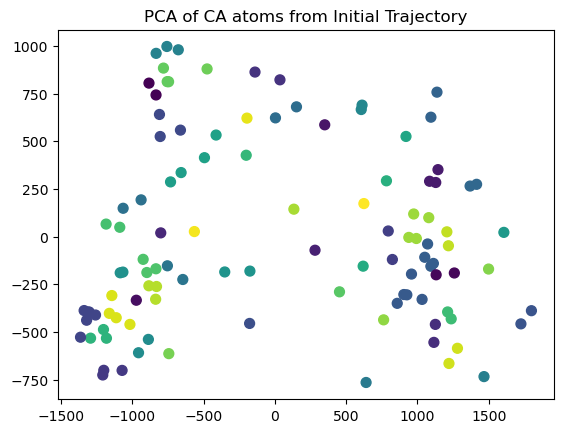

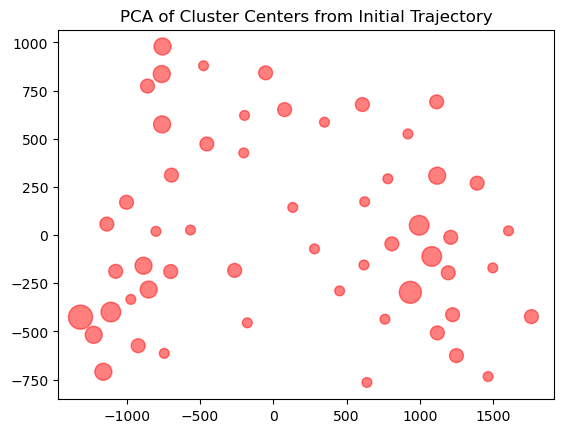

(2, 6)
Running benchmark for testHOIP
Running r split mode


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py


Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo.dat
AVG: ncol = 5, len(names) = 3
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP...   
1                                                NaN   

                                                 SEG               calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP...            Experimental   
1                                                NaN  HOIPapo_test_clustered   

  experimental                                                top  \
0        False                                                NaN   
1          NaN  /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP...   

                                                traj  
0                                                NaN  
1  [/home/alexi/Documents/ValDX/data/testHOIP/HOI...  
Structures loaded HOIPapo_test_clustered: 
HOIPapo_test_clustered Topology: <Unive

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_1/reweighting_gamma_2x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights


0.99999999999999990.99999999999999990.9999999999999999


Sum of Output Weights
0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909091, 0.01818

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0        6      18        1  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
1        6      21        2  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
2        6      25        3  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
3        7      25        6  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
4        8      20        8  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
5       11      20       13  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
6       11      21       14  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
7       19      25       17  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
8       27      33       20  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
9       33      40       21  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
10      34      41       23  /home/alexi/Documents/ValDX/data/testHOIP_r_na...
11      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(255,)
[5.21545455e+00 8.65136364e+00 9.41772727e+00 8.74318182e+00
 9.42454545e+00 9.94000000e+00 8.98454545e+00 9.96000000e+00
 1.17836364e+01 9.03727273e+00 8.94181818e+00 9.70863636e+00
 1.27645455e+01 1.14990909e+01 1.05868182e+01 1.08718182e+01
 9.29681818e+00 6.58363636e+00 7.25090909e+00 6.98727273e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 1.21786364e+01 9.82590909e+00 1.03286364e+01 1.12900000e+01
 1.07186364e+01 1.00490909e+01 1.30177273e+01 1.21400000e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_r_naive_random/train_HOIPapo_test_clustered_2/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds read
Hbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights


0.99999999999999990.99999999999999990.9999999999999999


Sum of Output Weights
0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909091, 0.01818

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide  \
55        6      25        3   
56        7      18        4   
57        8      18        7   
58        8      24       10   
59       11      25       16   
60       19      25       17   
61       33      40       21   
62       41      49       25   
63       41      51       26   
64       42      51       28   
65       42      65       29   
66       49      61       30   
67       50      65       32   
68       52      65       34   
69       74      84       35   
70       76      84       36   
71       77      88       40   
72       77      97       41   
73       98     106       47   
74       98     108       48   
75      113     120       49   
76      114     120       50   
77      117     131       51   
78      121     131       52   
79      121     132       53   
80      132     149       54   
81      150     169       57   
82      151     162       58   
83      151     167       59 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(275,)
[5.21545455e+00 8.65136364e+00 9.41772727e+00 8.74318182e+00
 9.42454545e+00 9.94000000e+00 8.98454545e+00 9.96000000e+00
 1.17836364e+01 9.03727273e+00 8.94181818e+00 9.70863636e+00
 1.27645455e+01 1.14990909e+01 1.05868182e+01 1.08718182e+01
 9.29681818e+00 6.58363636e+00 7.25090909e+00 6.98727273e+00
 6.64954545e+00 9.52545455e+00 8.05272727e+00 7.21090909e+00
 8.60000000e+00 9.23681818e+00 7.90181818e+00 6.82772727e+00
 5.79409091e+00 4.19681818e+00 4.07863636e+00 6.98272727e+00
 9.14727273e+00 9.62772727e+00 7.14772727e+00 7.02545455e+00
 7.11545455e+00 5.19954545e+00 7.23045455e+00 7.96181818e+00
 8.07500000e+00 9.27136364e+00 9.95181818e+00 8.94454545e+00
 8.92681818e+00 7.54363636e+00 8.92000000e+00 5.12954545e+00
 2.57681818e+00 4.04000000e+00 9.21909091e+00 1.24654545e+01
 1.13913636e+01 1.21786364e+01 9.82590909e+00 1.03286364e+01
 1.12900000e+01 1.07186364e+01 1.00490909e+01 1.30177273e+01
 1.21400000e+01 8.45590909e+00 8.91181818e+00 9.90636364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

ic| self.analysis_dump: {'testHOIP_r_naive_random': {'BV_constants':      Bc   Bh                       calc_name
                        0  0.35  2.0  train_HOIPapo_test_clustered_1
                        1  0.35  2.0  train_HOIPapo_test_clustered_2,
                                                     'HDX_data':      0.0       0.5       5.0  peptide                      calc_name  ResStr  \
                        0    0.0  0.418790  0.444380        0                   Experimental     NaN   
                        1    0.0  0.370960  0.452040        1                   Experimental     NaN   
                        2    0.0  0.400400  0.485440        2                   Experimental     NaN   
                        3    0.0  0.458750  0.515030        3                   Experimental     NaN   
                        4    0.0  0.417260  0.495190        4                   Experimental     NaN   
                        ..   ...       ...       ...      ...                     

plotting R agreement


               ResEnd                                               path  
          0       NaN                                                NaN  
          1       NaN                                                NaN  
          2       NaN                                                NaN  
          3       NaN                                                NaN  
          4       NaN                                                NaN  
          ..      ...                                                ...  
          322   356.0  /home/alexi/Documents/ValDX/data/testHOIP_r_na...  
          323   360.0  /home/alexi/Documents/ValDX/data/testHOIP_r_na...  
          324   357.0  /home/alexi/Documents/ValDX/data/testHOIP_r_na...  
          325   360.0  /home/alexi/Documents/ValDX/data/testHOIP_r_na...  
          326   379.0  /home/alexi/Documents/ValDX/data/testHOIP_r_na...  
          
          [327 rows x 8 columns]
ic| 'expt values'
ic| expt_values: [0.0,
               

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


ic| expt:      0.0      0.5      5.0  peptide     calc_name  ResStr  ResEnd path
          436  0.0  0.41879  0.44438        0  Experimental     NaN     NaN  NaN
          437  0.0  0.37096  0.45204        1  Experimental     NaN     NaN  NaN
          438  0.0  0.40040  0.48544        2  Experimental     NaN     NaN  NaN
          439  0.0  0.45875  0.51503        3  Experimental     NaN     NaN  NaN
          440  0.0  0.41726  0.49519        4  Experimental     NaN     NaN  NaN
          ..   ...      ...      ...      ...           ...     ...     ...  ...
          540  0.0  0.22028  0.25199      104  Experimental     NaN     NaN  NaN
          541  0.0  0.22217  0.24175      105  Experimental     NaN     NaN  NaN
          542  0.0  0.22454  0.24966      106  Experimental     NaN     NaN  NaN
          543  0.0  0.23913  0.27068      107  Experimental     NaN     NaN  NaN
          544  0.0  0.30758  0.36648      108  Experimental     NaN     NaN  NaN
          
          [109 ro

Finished evaluating HDX
     Bc   Bh                       calc_name
0  0.35  2.0  train_HOIPapo_test_clustered_1
1  0.35  2.0  train_HOIPapo_test_clustered_2
Analysis dumped to results/HOIPapo_test_clustered/Benchmark/testHOIP_r_naive_random/20240301-142137_analysis.csv
dict_keys(['testHOIP_r_naive_random'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_r_naive_random to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_r_naive_random to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_r_naive_random to df expt_segs
Key: train_segs
<class 'pandas.core.fr

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_1/reweighting_gamma_3x10^0



Contacts readContacts read
Contacts read
Hbonds read

Hbonds readHbonds read

Segments and experimental dfracs readSegments and experimental dfracs read
Segments and experimental dfracs read

Contacts read
Hbonds read
Segments and experimental dfracs read
Sum of Output WeightsSum of Output Weights

0.99999999999999990.9999999999999999

Sum of Output Weights
0.9999999999999999
Sum of Output Weights
0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0      132     150       55  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
1      132     153       56  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
2      150     169       57  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
3      151     162       58  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
4      151     167       59  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
5      151     169       60  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
6      151     170       61  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
7      154     169       62  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
8      155     169       63  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
9      169     183       64  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
10     170     183       65  /home/alexi/Documents/ValDX/data/testHOIP_s_na...
11     17

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(187,)
[1.41918182e+01 1.46350000e+01 1.23695455e+01 2.94090909e+00
 1.40318182e+00 5.18545455e+00 2.26545455e+00 3.01318182e+00
 5.55545455e+00 3.98363636e+00 4.55954545e+00 7.20863636e+00
 1.23913636e+01 1.21336364e+01 1.18759091e+01 1.14368182e+01
 1.15895455e+01 1.03645455e+01 1.01850000e+01 1.09500000e+01
 1.27413636e+01 1.05659091e+01 1.15809091e+01 1.13454545e+01
 9.29318182e+00 1.06168182e+01 1.06827273e+01 1.00890909e+01
 1.16413636e+01 1.14250000e+01 7.08000000e+00 6.34000000e+00
 7.17545455e+00 8.12318182e+00 8.35545455e+00 2.15681818e+00
 5.64818182e+00 4.62136364e+00 6.38636364e+00 6.84727273e+00
 8.94863636e+00 8.31772727e+00 7.72863636e+00 6.93545455e+00
 5.26545455e+00 5.03681818e+00 1.92954545e+00 1.77545455e+00
 8.68636364e-01 6.96818182e-01 1.23363636e+00 9.29090909e-01
 9.89090909e-01 9.48181818e-01 8.22272727e-01 8.65454545e-01
 1.10090909e+00 1.18045455e+00 1.19318182e+00 8.35000000e-01
 9.77272727e-01 1.11363636e+00 7.24545455e-01 4.81818182e-0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_2/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/testHOIP_s_naive_sequential/train_HOIPapo_test_clustered_2/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read



Hbonds read
Hbonds readHbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output WeightsSum of Output Weights


0.9999999999999999
0.9999999999999999
0.99999999999999990.9999999999999999


Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide  \
54      132     149       54   
55      132     150       55   
56      132     153       56   
57      150     169       57   
58      151     162       58   
59      151     167       59   
60      151     169       60   
61      151     170       61   
62      154     169       62   
63      155     169       63   
64      169     183       64   
65      170     183       65   
66      170     185       66   
67      170     186       67   
68      171     183       68   
69      171     186       69   
70      184     195       70   
71      184     208       71   
72      187     195       72   
73      187     208       73   
74      187     209       74   
75      188     208       75   
76      194     208       76   
77      196     208       77   
78      213     223       78   
79      224     238       79   
80      224     239       80   
81      247     257       81   
82      247     259       82 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(187,)
[1.41918182e+01 1.46350000e+01 1.23695455e+01 2.94090909e+00
 1.40318182e+00 5.18545455e+00 2.26545455e+00 3.01318182e+00
 5.55545455e+00 3.98363636e+00 4.55954545e+00 7.20863636e+00
 1.23913636e+01 1.21336364e+01 1.18759091e+01 1.14368182e+01
 1.15895455e+01 1.03645455e+01 1.01850000e+01 1.09500000e+01
 1.27413636e+01 1.05659091e+01 1.15809091e+01 1.13454545e+01
 9.29318182e+00 1.06168182e+01 1.06827273e+01 1.00890909e+01
 1.16413636e+01 1.14250000e+01 7.08000000e+00 6.34000000e+00
 7.17545455e+00 8.12318182e+00 8.35545455e+00 2.15681818e+00
 5.64818182e+00 4.62136364e+00 6.38636364e+00 6.84727273e+00
 8.94863636e+00 8.31772727e+00 7.72863636e+00 6.93545455e+00
 5.26545455e+00 5.03681818e+00 1.92954545e+00 1.77545455e+00
 8.68636364e-01 6.96818182e-01 1.23363636e+00 9.29090909e-01
 9.89090909e-01 9.48181818e-01 8.22272727e-01 8.65454545e-01
 1.10090909e+00 1.18045455e+00 1.19318182e+00 8.35000000e-01
 9.77272727e-01 1.11363636e+00 7.24545455e-01 4.81818182e-0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

540   360.0  NaN  
                        541   357.0  NaN  
                        542   360.0  NaN  
                        543   360.0  NaN  
                        544   379.0  NaN  
                        
                        [545 rows x 8 columns],
                                                         'LogPfs':                                                LogPf  \
                        0  [2.742272727272727, 4.962272727272725, 5.00954...   
                        1  [2.8281818181818155, 4.842727272727269, 4.9490...   
                        2  [14.19181818181818, 14.634999999999994, 12.369...   
                        3  [2.742272727272727, 4.962272727272725, 5.00954...   
                        4  [2.742272727272727, 4.962272727272725, 5.00954...   
                        5  [2.8281818181818155, 4.842727272727269, 4.9490...   
                        6  [14.19181818181818, 14.634999999999994, 12.369...   
                        7  [2.742272727272727, 4.9622

plotting R agreement


ic| 'Values to compute R values'
ic| R_expt_values: [0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                 

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


]
ic| 'ARGUMENTS'
ic| args: ['Experimental',
           'train_HOIPapo_test_clustered_1',
           'train_HOIPapo_test_clustered_2',
           'val_HOIPapo_test_clustered_1',
           'val_HOIPapo_test_clustered_2']
ic| data.columns: Index([0.0, 0.5, 5.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path'], dtype='object')
ic| data[key].values: array(['train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clust

Finished evaluating HDX
     Bc   Bh                       calc_name
0  0.35  2.0  train_HOIPapo_test_clustered_1
1  0.35  2.0  train_HOIPapo_test_clustered_2
Analysis dumped to results/HOIPapo_test_clustered/Benchmark/testHOIP_s_naive_sequential/20240301-142429_analysis.csv
dict_keys(['testHOIP_s_naive_sequential'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_s_naive_sequential to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_s_naive_sequential to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_s_naive_sequential to df expt_segs
Key: train_segs
<c

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts read


Hbonds readHbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs readContacts read

Hbonds read
Segments and experimental dfracs read
Sum of Output WeightsSum of Output Weights

0.99999999999999990.9999999999999999

Sum of Output Weights
0.9999999999999999
Sum of Output Weights
0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909091, 0.01818182,

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0        1       7        0  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
1        6      18        1  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
2        6      21        2  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
3        6      25        3  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
4        7      18        4  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
5        7      21        5  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
6        7      25        6  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
7        8      18        7  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
8        8      20        8  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
9        8      21        9  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
10       8      24       10  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
11       

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(135,)
[ 2.74227273  4.96227273  5.00954545  5.21545455  8.65136364  9.41772727
  8.74318182  9.42454545  9.94        8.98454545  9.96       11.78363636
  9.03727273  8.94181818  9.70863636 12.76454545 11.49909091 10.58681818
 10.87181818  9.29681818  6.58363636  7.25090909  6.98727273  3.32181818
  6.62181818  2.85727273  4.20318182  6.21090909  2.71727273  3.41409091
  6.64954545  9.52545455  8.05272727  7.21090909  8.6         9.23681818
  7.90181818  6.82772727  5.79409091  4.19681818  4.07863636  6.98272727
  9.14727273  9.62772727  7.14772727  7.02545455  7.11545455  5.19954545
  7.23045455  7.96181818  8.075       9.27136364  9.95181818  8.94454545
  8.92681818  7.54363636  8.92        5.12954545  2.57681818  4.04
  6.72454545  4.98909091 10.21136364  8.35227273  5.38181818  7.50727273
  9.17       10.89545455  9.47727273 10.27863636  9.025      12.41772727
 12.70590909  5.84318182  4.12045455  4.97454545  2.51818182  9.51409091
 14.19181818 14.635      12.369

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_2/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_R3_k_sequence/train_HOIPapo_test_clustered_2/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds read
Hbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read



Sum of Output WeightsSum of Output WeightsSum of Output WeightsSum of Output Weights



0.99999999999999990.99999999999999990.99999999999999990.9999999999999999



Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909091, 0.01818182,

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_2
    ResStr  ResEnd  peptide                                               path
50      34      40       22  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
51      34      41       23  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
52      41      48       24  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
53      41      49       25  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
54      41      51       26  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
55      42      49       27  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
56      42      51       28  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
57      42      65       29  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
58      49      61       30  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
59      49      65       31  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
60      50      65       32  /home/alexi/Documents/ValDX/data/testHOIP_R3_k...
61      5

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(140,)
[9.52545455e+00 8.05272727e+00 7.21090909e+00 8.60000000e+00
 9.23681818e+00 7.90181818e+00 6.82772727e+00 5.79409091e+00
 4.19681818e+00 4.07863636e+00 6.98272727e+00 9.14727273e+00
 9.62772727e+00 7.14772727e+00 7.02545455e+00 7.11545455e+00
 5.19954545e+00 7.23045455e+00 7.96181818e+00 8.07500000e+00
 9.27136364e+00 9.95181818e+00 8.94454545e+00 8.92681818e+00
 7.54363636e+00 8.92000000e+00 5.12954545e+00 2.57681818e+00
 4.04000000e+00 9.21909091e+00 1.24654545e+01 1.13913636e+01
 1.21786364e+01 9.82590909e+00 1.03286364e+01 1.12900000e+01
 1.07186364e+01 1.00490909e+01 1.30177273e+01 1.21400000e+01
 8.45590909e+00 8.91181818e+00 9.90636364e+00 1.00995455e+01
 1.60772727e+00 3.92318182e+00 1.93363636e+00 1.57500000e+00
 4.37045455e+00 5.81500000e+00 7.46090909e+00 9.52090909e+00
 6.59909091e+00 7.51318182e+00 5.37409091e+00 7.77500000e+00
 3.43636364e+00 8.87409091e+00 1.24772727e+01 8.53500000e+00
 7.17045455e+00 1.27413636e+01 1.05659091e+01 1.15809091e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

                        3       NaN  NaN  
                        4       NaN  NaN  
                        ..      ...  ...  
                        513   360.0  NaN  
                        514   357.0  NaN  
                        515   360.0  NaN  
                        516   360.0  NaN  
                        517   379.0  NaN  
                        
                        [518 rows x 8 columns],
                                                    'LogPfs':                                                LogPf  \
                        0  [9.219090909090905, 12.465454545454543, 11.391...   
                        1  [2.8281818181818155, 4.842727272727269, 4.9490...   
                        2  [2.742272727272727, 4.962272727272725, 5.00954...   
                        3  [2.742272727272727, 4.962272727272725, 5.00954...   
                        4  [2.742272727272727, 4.962272727272725, 5.00954...   
                        5  [2.8281818181818155, 4.842727272727269

plotting R agreement


43,  44,  45,  46,  47,
                      48,  62,  63,  64,  65,  68,  81,  82,  83,  84,  85,  86,  87,
                      88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
                     101, 102, 103, 104, 105, 106, 107, 108])
ic| 'Values to compute R values'
ic| R_expt_values: [0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
         

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


ic| 'ARGUMENTS'
ic| args: ['Experimental',
           'train_HOIPapo_test_clustered_1',
           'train_HOIPapo_test_clustered_2',
           'val_HOIPapo_test_clustered_1',
           'val_HOIPapo_test_clustered_2']
ic| data.columns: Index([0.0, 0.5, 5.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path'], dtype='object')
ic| data[key].values: array(['train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_cluster

Finished evaluating HDX
     Bc   Bh                       calc_name
0  0.35  2.0  train_HOIPapo_test_clustered_1
1  0.35  2.0  train_HOIPapo_test_clustered_2
Analysis dumped to results/HOIPapo_test_clustered/Benchmark/testHOIP_R3_k_sequence/20240301-142718_analysis.csv
dict_keys(['testHOIP_R3_k_sequence'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_R3_k_sequence to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_R3_k_sequence to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_R3_k_sequence to df expt_segs
Key: train_segs
<class 'pandas.core.frame.D

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

Residue intersection:  [150 151 152 153 184 185 186]
Intersection peptides:  [55 56 57 58 59 60 61 66 67 69 70 71]
0.11009174311926606
Train peptides:  [ 35  36  37  38  39  40  41  42  43  44  45  46  47  48  62  63  64  65
  68  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108]
0.43119266055045874
Val peptides:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 49 50 51 52 53 54 72 73 74 75 76 77 78
 79 80]
0.45871559633027525
train_segs
    ResStr  ResEnd  peptide                       calc_name
35      74      84       35  train_HOIPapo_test_clustered_1
36      76      84       36  train_HOIPapo_test_clustered_1
37      77      84       37  train_HOIPapo_test_clustered_1
38      77      85       38  train_HOIPapo_test_clustered_1
39      77      87       39  train_HOIPapo_test_clustered_1
Saved train HOIPapo_test_clustered_1 segments to /home/alexi/Documents/ValDX

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

conda run -n HDXER_ENV python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/ValDX/data/testHOIP/HOIPapo_test_clustered_cfrac1_0.5_.xtc -p /home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_apo_protonated.pdb -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_1/calc_hdx_train_HOIPapo_test_clustered_1.log -out /home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_1/out__train_HOIPapo_test_clustered_1 -seg /home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_1/train_residue_segs__HOIPapo_test_clustered_.txt -mopt "{ 'save_detailed' : True }" --times 0 0.5 5.0 -str 1
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-mas

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds read
Hbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights


0.99999999999999990.99999999999999990.9999999999999999
Sum of Output Weights


0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909091, 0.01818182, 0.01818

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0        1       7        0  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
1        6      18        1  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
2        6      21        2  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
3        6      25        3  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
4        7      18        4  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
5        7      21        5  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
6        7      25        6  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
7        8      18        7  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
8        8      20        8  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
9        8      21        9  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
10       8      24       10  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
11       

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(135,)
[ 2.74227273  4.96227273  5.00954545  5.21545455  8.65136364  9.41772727
  8.74318182  9.42454545  9.94        8.98454545  9.96       11.78363636
  9.03727273  8.94181818  9.70863636 12.76454545 11.49909091 10.58681818
 10.87181818  9.29681818  6.58363636  7.25090909  6.98727273  3.32181818
  6.62181818  2.85727273  4.20318182  6.21090909  2.71727273  3.41409091
  6.64954545  9.52545455  8.05272727  7.21090909  8.6         9.23681818
  7.90181818  6.82772727  5.79409091  4.19681818  4.07863636  6.98272727
  9.14727273  9.62772727  7.14772727  7.02545455  7.11545455  5.19954545
  7.23045455  7.96181818  8.075       9.27136364  9.95181818  8.94454545
  8.92681818  7.54363636  8.92        5.12954545  2.57681818  4.04
  6.72454545  4.98909091 10.21136364  8.35227273  5.38181818  7.50727273
  9.17       10.89545455  9.47727273 10.27863636  9.025      12.41772727
 12.70590909  5.84318182  4.12045455  4.97454545  2.51818182  9.51409091
 14.19181818 14.635      12.369

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:753: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
mkdssp: error while loading shared libraries: libboost_thread.so.1.73.0: cannot open shared object file: No such file or directory
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will 

Saved val HOIPapo_test_clustered_2 segments to /home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/val_HOIPapo_test_clustered_2/val_residue_segs__HOIPapo_test_clustered_.txt
Val Peptide numbers: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 62 63 64 65 68 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98]
train_HDX_data
    0.0      0.5      5.0  peptide                       calc_name  \
0   0.0  0.41879  0.44438        0  train_HOIPapo_test_clustered_2   
1   0.0  0.37096  0.45204        1  train_HOIPapo_test_clustered_2   
2   0.0  0.40040  0.48544        2  train_HOIPapo_test_clustered_2   
3   0.0  0.45875  0.51503        3  train_HOIPapo_test_clustered_2   
4   0.0  0.41726  0.49519        4  train_HOIPapo_test_clustered_2   
5   0.0  0.44176  0.50927        5  train_HOIPapo_test_clustered_2   
6   0.0  0.48987  0.54090        6  train_HOIPapo_test_clustered_2   
7   0.0  0.41316  0.48254        7  train_HOIPapo_test_clustered_2   
8   

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_xR_no_loops/train_HOIPapo_test_clustered_2/reweighting_gamma_5x10^0



Contacts readContacts readContacts read


Hbonds readHbonds readHbonds read


Contacts read
Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights


0.99999999999999990.9999999999999999

0.9999999999999999
Sum of Output Weights
0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909091, 0.01818182, 0.01818

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_2
    ResStr  ResEnd  peptide                                               path
50      34      40       22  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
51      34      41       23  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
52      41      48       24  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
53      41      49       25  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
54      41      51       26  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
55      42      49       27  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
56      42      51       28  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
57      42      65       29  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
58      49      61       30  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
59      49      65       31  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
60      50      65       32  /home/alexi/Documents/ValDX/data/testHOIP_xR_n...
61      5

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(140,)
[9.52545455e+00 8.05272727e+00 7.21090909e+00 8.60000000e+00
 9.23681818e+00 7.90181818e+00 6.82772727e+00 5.79409091e+00
 4.19681818e+00 4.07863636e+00 6.98272727e+00 9.14727273e+00
 9.62772727e+00 7.14772727e+00 7.02545455e+00 7.11545455e+00
 5.19954545e+00 7.23045455e+00 7.96181818e+00 8.07500000e+00
 9.27136364e+00 9.95181818e+00 8.94454545e+00 8.92681818e+00
 7.54363636e+00 8.92000000e+00 5.12954545e+00 2.57681818e+00
 4.04000000e+00 9.21909091e+00 1.24654545e+01 1.13913636e+01
 1.21786364e+01 9.82590909e+00 1.03286364e+01 1.12900000e+01
 1.07186364e+01 1.00490909e+01 1.30177273e+01 1.21400000e+01
 8.45590909e+00 8.91181818e+00 9.90636364e+00 1.00995455e+01
 1.60772727e+00 3.92318182e+00 1.93363636e+00 1.57500000e+00
 4.37045455e+00 5.81500000e+00 7.46090909e+00 9.52090909e+00
 6.59909091e+00 7.51318182e+00 5.37409091e+00 7.77500000e+00
 3.43636364e+00 8.87409091e+00 1.24772727e+01 8.53500000e+00
 7.17045455e+00 1.27413636e+01 1.05659091e+01 1.15809091e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

0.485440        2                   Experimental     NaN   
                        3    0.0  0.458750  0.515030        3                   Experimental     NaN   
                        4    0.0  0.417260  0.495190        4                   Experimental     NaN   
                        ..   ...       ...       ...      ...                            ...     ...   
                        513  0.0  0.897280  0.951715      104  test_HOIPapo_test_clustered_2   336.0   
                        514  0.0  0.872055  0.938303      105  test_HOIPapo_test_clustered_2   338.0   
                        515  0.0  0.887497  0.947117      106  test_HOIPapo_test_clustered_2   338.0   
                        516  0.0  0.881871  0.944473      107  test_HOIPapo_test_clustered_2   339.0   
                        517  0.0  0.635386  0.873566      108  test_HOIPapo_test_clustered_2   361.0   
                        
                             ResEnd path  
                        0       NaN  NaN

plotting R agreement


0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0]
ic| R_arg_values: [0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


ic| 'ARGUMENTS'
ic| args: ['Experimental',
           'train_HOIPapo_test_clustered_1',
           'train_HOIPapo_test_clustered_2',
           'val_HOIPapo_test_clustered_1',
           'val_HOIPapo_test_clustered_2']
ic| data.columns: Index([0.0, 0.5, 5.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path'], dtype='object')
ic| data[key].values: array(['train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_cluster

Finished evaluating HDX
     Bc   Bh                       calc_name
0  0.35  2.0  train_HOIPapo_test_clustered_1
1  0.35  2.0  train_HOIPapo_test_clustered_2
Analysis dumped to results/HOIPapo_test_clustered/Benchmark/testHOIP_xR_no_loops/20240301-143008_analysis.csv
dict_keys(['testHOIP_xR_no_loops'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_xR_no_loops to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_xR_no_loops to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_xR_no_loops to df expt_segs
Key: train_segs
<class 'pandas.core.frame.DataFrame'>

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output Weights
0.9999999999999999
Sum of Output WeightsSum of Output Weights

0.99999999999999990.9999999999999999

Sum of Output Weights
0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0        1       7        0  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
1      213     223       78  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
2      224     238       79  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
3      224     239       80  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
4      247     257       81  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
5      247     259       82  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
6      247     260       83  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
7      248     259       84  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
8      248     260       85  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
9      250     257       86  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
10     250     260       87  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
11     25

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(121,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 2.13181818e-01 2.40545455e+00 1.40177273e+01
 9.26727273e+00 3.70363636e+00 3.81818182e+00 6.91272727e+00
 4.54181818e+00 5.15909091e+00 1.09477273e+01 8.15818182e+00
 1.19004545e+01 1.19804545e+01 1.22972727e+01 4.33045455e+00
 5.30090909e+00 7.45590909e+00 7.02863636e+00 7.86545455e+00
 1.31404545e+01 1.28800000e+01 3.27727273e+00 5.93727273e+00
 1.80090909e+00 8.35818182e+00 8.61181818e+00 3.55090909e+00
 6.22818182e+00 4.79227273e+00 3.84363636e+00 8.07590909e+00
 4.18409091e+00 5.96000000e+00 4.80454545e-01 5.09090909e-01
 1.87727273e-01 1.49545455e-01 1.40000000e-01 1.27272727e-02
 6.36363636e-03 1.90909091e-02 6.04545455e-02 3.33636364e-01
 2.57727273e-01 2.29090909e-01 3.50000000e-01 3.85000000e-01
 3.75454545e-01 1.75000000e-01 3.34090909e-01 5.13636364e-01
 6.50363636e+00 1.05609091e+01 4.32409091e+00 4.05272727e+00
 3.65272727e+00 6.84909091e+00 6.33409091e+00 5.78136364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_Sp_res_neighbours/train_HOIPapo_test_clustered_2/reweighting_gamma_5x10^0



Contacts readContacts readContacts read
Contacts read


Hbonds read
Hbonds readHbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read

Sum of Output WeightsSum of Output WeightsSum of Output Weights
0.9999999999999999

Sum of Output Weights
0.99999999999999990.9999999999999999

0.9999999999999999

Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091, 0.00909

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_2
    ResStr  ResEnd  peptide                                               path
32       1       7        0  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
33      41      48       24  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
34      41      49       25  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
35      41      51       26  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
36      42      49       27  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
37      42      51       28  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
38      42      65       29  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
39      49      61       30  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
40      49      65       31  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
41      50      65       32  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
42      52      61       33  /home/alexi/Documents/ValDX/data/testHOIP_Sp_r...
43      5

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(115,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 2.15681818e+00 5.64818182e+00 4.62136364e+00 6.38636364e+00
 6.84727273e+00 8.94863636e+00 8.31772727e+00 7.72863636e+00
 6.93545455e+00 5.26545455e+00 5.03681818e+00 1.92954545e+00
 1.77545455e+00 8.68636364e-01 6.96818182e-01 1.23363636e+00
 9.29090909e-01 9.89090909e-01 9.48181818e-01 8.22272727e-01
 8.65454545e-01 1.10090909e+00 1.18045455e+00 1.19318182e+00
 8.35000000e-01 9.77272727e-01 1.11363636e+00 7.24545455e-01
 4.81818182e-01 3.81818182e-01 2.40000000e-01 1.20909091e-01
 2.19545455e-01 2.73636364e-01 1.55909091e-01 4.77272727e-0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

  NaN  
                        4       NaN  NaN  
                        ..      ...  ...  
                        464   360.0  NaN  
                        465   357.0  NaN  
                        466   360.0  NaN  
                        467   360.0  NaN  
                        468   379.0  NaN  
                        
                        [469 rows x 8 columns],
                                                        'LogPfs':                                                LogPf  \
                        0  [11.499090909090915, 10.586818181818183, 10.87...   
                        1  [2.8281818181818155, 4.842727272727269, 4.9490...   
                        2  [2.742272727272727, 4.962272727272725, 5.00954...   
                        3  [2.742272727272727, 4.962272727272725, 5.00954...   
                        4  [11.499090909090915, 10.586818181818183, 10.87...   
                        5  [2.8281818181818155, 4.842727272727269, 4.9490...   
                

plotting R agreement


                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0]
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
ic| R: nan
ic| f"{arg} values": 'train_HOIPapo_test_clustered_2 values'
ic| arg_values: 141    0.0
                142    0.0
                143    0.0
                144    0.0
                145    0.0
                146    0.0
                147    0.0
                148    0.0
                149    0.0
                150    0.0
                151    0.0
                152    0.0
                153    0.0
                154    0.0
                155    0.0
                156    0.0
                157    0.0
                158    0.0
                159    0.0
  

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


        4  Experimental     NaN     NaN  NaN
          ..   ...      ...      ...      ...           ...     ...     ...  ...
          388  0.0  0.22028  0.25199      104  Experimental     NaN     NaN  NaN
          389  0.0  0.22217  0.24175      105  Experimental     NaN     NaN  NaN
          390  0.0  0.22454  0.24966      106  Experimental     NaN     NaN  NaN
          391  0.0  0.23913  0.27068      107  Experimental     NaN     NaN  NaN
          392  0.0  0.30758  0.36648      108  Experimental     NaN     NaN  NaN
          
          [109 rows x 8 columns]
ic| 'ARGUMENTS'
ic| args: ['Experimental',
           'train_HOIPapo_test_clustered_1',
           'train_HOIPapo_test_clustered_2',
           'val_HOIPapo_test_clustered_1',
           'val_HOIPapo_test_clustered_2']
ic| data.columns: Index([0.0, 0.5, 5.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path'], dtype='object')
ic| data[key].values: array(['train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',


Finished evaluating HDX
     Bc   Bh                       calc_name
0  0.35  2.0  train_HOIPapo_test_clustered_1
1  0.35  2.0  train_HOIPapo_test_clustered_2
Analysis dumped to results/HOIPapo_test_clustered/Benchmark/testHOIP_Sp_res_neighbours/20240301-143255_analysis.csv
dict_keys(['testHOIP_Sp_res_neighbours'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_Sp_res_neighbours to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_Sp_res_neighbours to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_Sp_res_neighbours to df expt_segs
Key: train_segs
<class 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

Saved train HOIPapo_test_clustered HDX data to /home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_1/train_HOIPapo_test_clustered_1_expt_dfracs.dat
    ResStr  ResEnd  0.0      0.5      5.0  peptide  \
0       52      61  0.0  0.29666  0.37860       33   
1       52      65  0.0  0.38440  0.44775       34   
2      184     195  0.0  0.38633  0.44869       70   
3      187     195  0.0  0.36820  0.37879       72   
4      224     238  0.0  0.20249  0.21472       79   
5      224     239  0.0  0.16260  0.17496       80   
6      247     257  0.0  0.05688  0.07274       81   
7      247     259  0.0  0.07600  0.11464       82   
8      247     260  0.0  0.08147  0.13526       83   
9      248     259  0.0  0.08527  0.13242       84   
10     248     260  0.0  0.08569  0.14304       85   
11     250     257  0.0  0.06291  0.07885       86   
12     250     260  0.0  0.09393  0.16201       87   
13     253     260  0.0  0.10385  0.19651       88   
14 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds read
Hbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output WeightsSum of Output Weights



0.99999999999999990.99999999999999990.99999999999999990.9999999999999999



Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091,

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_1
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0       52      61       33  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
1       52      65       34  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
2      184     195       70  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
3      187     195       72  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
4      224     238       79  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
5      224     239       80  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
6      247     257       81  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
7      247     259       82  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
8      247     260       83  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
9      248     259       84  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
10     248     260       85  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
11     25

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(63,)
[5.19954545e+00 7.23045455e+00 7.96181818e+00 8.07500000e+00
 9.27136364e+00 9.95181818e+00 8.94454545e+00 8.92681818e+00
 7.54363636e+00 8.92000000e+00 5.12954545e+00 2.57681818e+00
 4.04000000e+00 6.96818182e-01 1.23363636e+00 9.29090909e-01
 9.89090909e-01 9.48181818e-01 8.22272727e-01 8.65454545e-01
 1.10090909e+00 1.18045455e+00 1.19318182e+00 8.35000000e-01
 1.09477273e+01 8.15818182e+00 1.19004545e+01 1.19804545e+01
 1.22972727e+01 4.33045455e+00 5.30090909e+00 7.45590909e+00
 7.02863636e+00 7.86545455e+00 1.31404545e+01 1.28800000e+01
 3.27727273e+00 5.93727273e+00 1.80090909e+00 8.35818182e+00
 8.61181818e+00 3.55090909e+00 6.22818182e+00 4.79227273e+00
 3.84363636e+00 8.07590909e+00 4.18409091e+00 5.96000000e+00
 4.80454545e-01 5.09090909e-01 1.87727273e-01 1.49545455e-01
 1.40000000e-01 1.27272727e-02 6.36363636e-03 1.90909091e-02
 6.04545455e-02 3.33636364e-01 2.57727273e-01 2.29090909e-01
 3.50000000e-01 3.85000000e-01 3.75454545e-01]
LogPf_by_res 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithC

Saved train HOIPapo_test_clustered HDX data to /home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_2/train_HOIPapo_test_clustered_2_expt_dfracs.dat
    ResStr  ResEnd  0.0      0.5      5.0  peptide  \
0      196     208  0.0  0.13267  0.18143       77   
1      213     223  0.0  0.35203  0.42601       78   
2      224     238  0.0  0.20249  0.21472       79   
3      224     239  0.0  0.16260  0.17496       80   
4      247     257  0.0  0.05688  0.07274       81   
5      247     259  0.0  0.07600  0.11464       82   
6      247     260  0.0  0.08147  0.13526       83   
7      248     259  0.0  0.08527  0.13242       84   
8      248     260  0.0  0.08569  0.14304       85   
9      250     257  0.0  0.06291  0.07885       86   
10     250     260  0.0  0.09393  0.16201       87   
11     253     260  0.0  0.10385  0.19651       88   
12     261     275  0.0  0.53877  0.49943       89   
13     261     276  0.0  0.51417  0.47866       90   
14 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_2/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/testHOIP_SR_stratified_space/train_HOIPapo_test_clustered_2/reweighting_gamma_3x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs read
Segments and experimental dfracs read

Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights


0.99999999999999990.99999999999999990.9999999999999999Sum of Output Weights



0.9999999999999999
Finished reweighting
[(array([0.01818182, 0.01818182, 0.00909091, 0.00909091, 0.02727273,
       0.00909091,

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_HOIPapo_test_clustered_2
     ResStr  ResEnd  peptide
0         1       7        0
1         6      18        1
2         6      21        2
3         6      25        3
4         7      18        4
..      ...     ...      ...
104     336     360      104
105     338     357      105
106     338     360      106
107     339     360      107
108     361     379      108

[109 rows x 3 columns]
Residues for recalculation: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_HOIPapo_test_clustered_2
    ResStr  ResEnd  peptide                                               path
16     196     208       77  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
17     213     223       78  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
18     224     238       79  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
19     224     239       80  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
20     247     257       81  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
21     247     259       82  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
22     247     260       83  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
23     248     259       84  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
24     248     260       85  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
25     250     257       86  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
26     250     260       87  /home/alexi/Documents/ValDX/data/testHOIP_SR_s...
27     25

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(61,)
[9.77272727e-01 1.11363636e+00 7.24545455e-01 4.81818182e-01
 3.81818182e-01 2.40000000e-01 1.20909091e-01 2.19545455e-01
 2.73636364e-01 1.55909091e-01 2.13181818e-01 2.40545455e+00
 1.40177273e+01 9.26727273e+00 3.70363636e+00 3.81818182e+00
 6.91272727e+00 4.54181818e+00 5.15909091e+00 1.09477273e+01
 8.15818182e+00 1.19004545e+01 1.19804545e+01 1.22972727e+01
 4.33045455e+00 5.30090909e+00 7.45590909e+00 7.02863636e+00
 7.86545455e+00 1.31404545e+01 1.28800000e+01 3.27727273e+00
 5.93727273e+00 1.80090909e+00 8.35818182e+00 8.61181818e+00
 3.55090909e+00 6.22818182e+00 4.79227273e+00 3.84363636e+00
 8.07590909e+00 4.18409091e+00 5.96000000e+00 4.80454545e-01
 5.09090909e-01 1.87727273e-01 1.49545455e-01 1.40000000e-01
 1.27272727e-02 6.36363636e-03 1.90909091e-02 6.04545455e-02
 3.33636364e-01 2.57727273e-01 2.29090909e-01 3.50000000e-01
 3.85000000e-01 3.75454545e-01 1.75000000e-01 3.34090909e-01
 5.13636364e-01]
LogPf_by_res [9.77272727e-01 1.11363636e+00

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(297,)
[2.74227273e+00 4.96227273e+00 5.00954545e+00 5.21545455e+00
 8.65136364e+00 9.41772727e+00 8.74318182e+00 9.42454545e+00
 9.94000000e+00 8.98454545e+00 9.96000000e+00 1.17836364e+01
 9.03727273e+00 8.94181818e+00 9.70863636e+00 1.27645455e+01
 1.14990909e+01 1.05868182e+01 1.08718182e+01 9.29681818e+00
 6.58363636e+00 7.25090909e+00 6.98727273e+00 3.32181818e+00
 6.62181818e+00 2.85727273e+00 4.20318182e+00 6.21090909e+00
 2.71727273e+00 3.41409091e+00 6.64954545e+00 9.52545455e+00
 8.05272727e+00 7.21090909e+00 8.60000000e+00 9.23681818e+00
 7.90181818e+00 6.82772727e+00 5.79409091e+00 4.19681818e+00
 4.07863636e+00 6.98272727e+00 9.14727273e+00 9.62772727e+00
 7.14772727e+00 7.02545455e+00 7.11545455e+00 5.19954545e+00
 7.23045455e+00 7.96181818e+00 8.07500000e+00 9.27136364e+00
 9.95181818e+00 8.94454545e+00 8.92681818e+00 7.54363636e+00
 8.92000000e+00 5.12954545e+00 2.57681818e+00 4.04000000e+00
 9.21909091e+00 1.24654545e+01 1.13913636e+01 1.21786364e+0


                        1  [2.8281818181818155, 4.842727272727269, 4.9490...   
                        2  [5.199545454545453, 7.230454545454543, 7.96181...   
                        3  [2.742272727272727, 4.962272727272725, 5.00954...   
                        4  [2.742272727272727, 4.962272727272725, 5.00954...   
                        5  [2.8281818181818155, 4.842727272727269, 4.9490...   
                        6  [0.977272727272727, 1.113636363636363, 0.72454...   
                        7  [2.742272727272727, 4.962272727272725, 5.00954...   
                        
                                                    calc_name  \
                        0      train_HOIPapo_test_clustered_1   
                        1  no_weight_HOIPapo_test_clustered_1   
                        2        val_HOIPapo_test_clustered_1   
                        3       test_HOIPapo_test_clustered_1   
                        4      train_HOIPapo_test_clustered_2   
                        

plotting R agreement



                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,

concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df


  NaN
          396  0.0  0.22454  0.24966      106  Experimental     NaN     NaN  NaN
          397  0.0  0.23913  0.27068      107  Experimental     NaN     NaN  NaN
          398  0.0  0.30758  0.36648      108  Experimental     NaN     NaN  NaN
          
          [109 rows x 8 columns]
ic| 'ARGUMENTS'
ic| args: ['Experimental',
           'train_HOIPapo_test_clustered_1',
           'train_HOIPapo_test_clustered_2',
           'val_HOIPapo_test_clustered_1',
           'val_HOIPapo_test_clustered_2']
ic| data.columns: Index([0.0, 0.5, 5.0, 'peptide', 'calc_name', 'ResStr', 'ResEnd', 'path'], dtype='object')
ic| data[key].values: array(['train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clustered_1',
                             'train_HOIPapo_test_clustered_1', 'train_HOIPapo_test_clust

Finished evaluating HDX
     Bc   Bh                       calc_name
0  0.35  2.0  train_HOIPapo_test_clustered_1
1  0.35  2.0  train_HOIPapo_test_clustered_2
Analysis dumped to results/HOIPapo_test_clustered/Benchmark/testHOIP_SR_stratified_space/20240301-143546_analysis.csv
dict_keys(['testHOIP_SR_stratified_space'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_SR_stratified_space to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_SR_stratified_space to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding testHOIP_SR_stratified_space to df expt_segs
Key: train_se

ic| 'plotting benchmark MSE by split'
ic| 'plotting benchmark BV boxplot by split type'


      Bc   Bh                       calc_name                          name  \
0   0.35  2.0  train_HOIPapo_test_clustered_1       testHOIP_r_naive_random   
1   0.35  2.0  train_HOIPapo_test_clustered_2       testHOIP_r_naive_random   
2   0.35  2.0  train_HOIPapo_test_clustered_1   testHOIP_s_naive_sequential   
3   0.35  2.0  train_HOIPapo_test_clustered_2   testHOIP_s_naive_sequential   
4   0.35  2.0  train_HOIPapo_test_clustered_1        testHOIP_R3_k_sequence   
5   0.35  2.0  train_HOIPapo_test_clustered_2        testHOIP_R3_k_sequence   
6   0.35  2.0  train_HOIPapo_test_clustered_1          testHOIP_xR_no_loops   
7   0.35  2.0  train_HOIPapo_test_clustered_2          testHOIP_xR_no_loops   
8   0.35  2.0  train_HOIPapo_test_clustered_1    testHOIP_Sp_res_neighbours   
9   0.35  2.0  train_HOIPapo_test_clustered_2    testHOIP_Sp_res_neighbours   
10  0.35  2.0  train_HOIPapo_test_clustered_1  testHOIP_SR_stratified_space   
11  0.35  2.0  train_HOIPapo_test_clustered_2  testH

Warning: No HDX data found for Experimental.

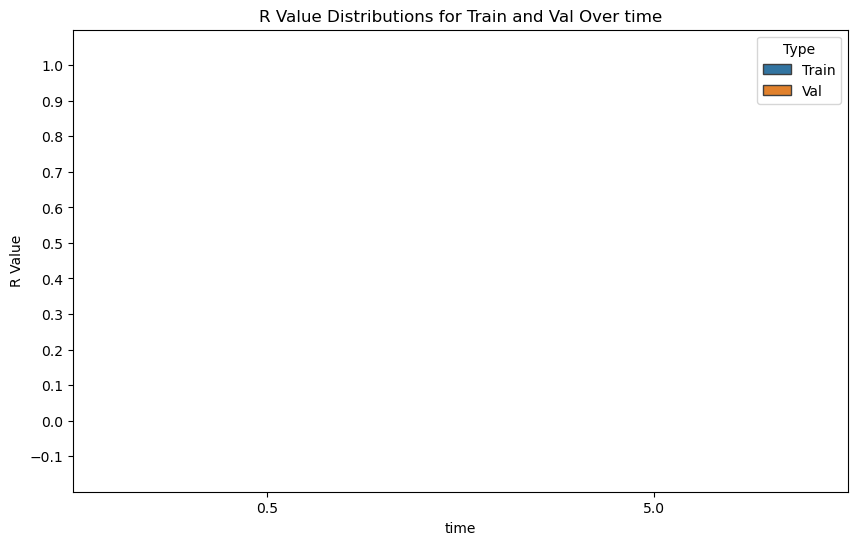

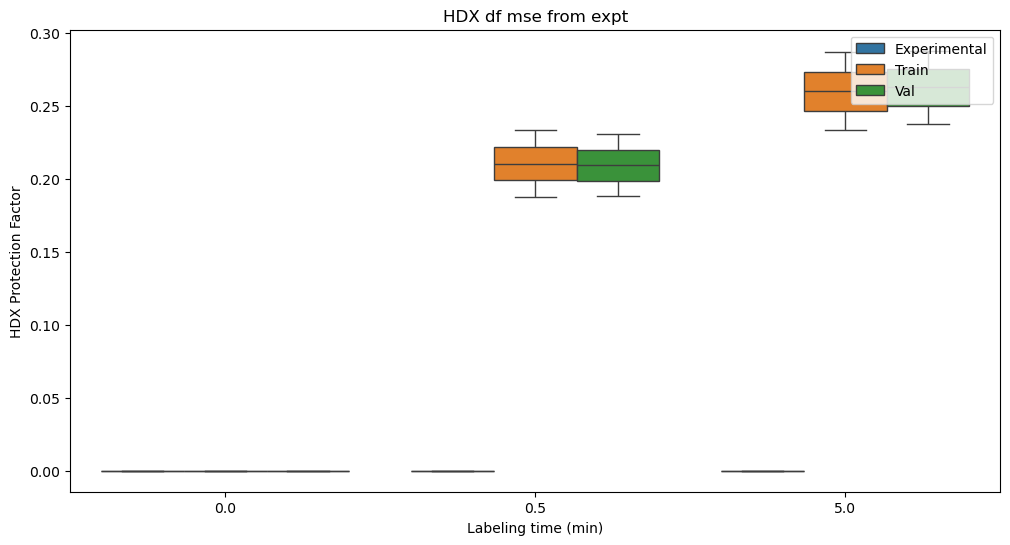

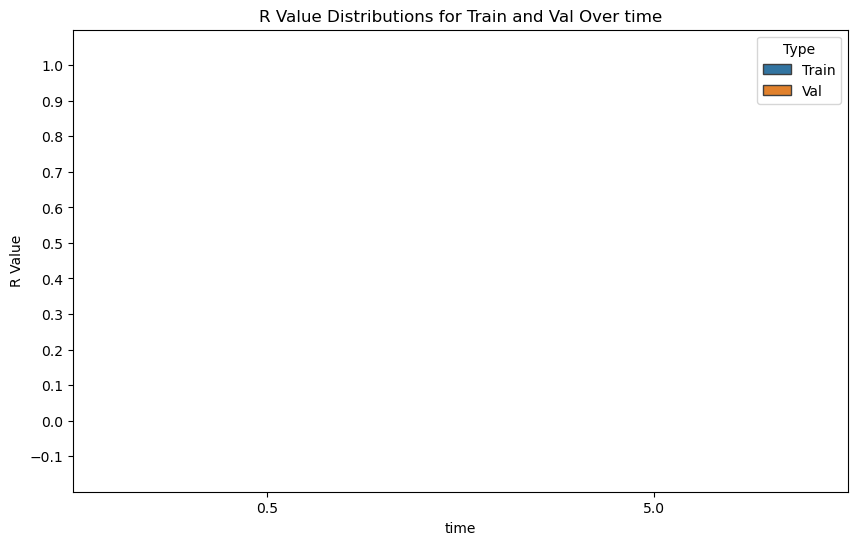

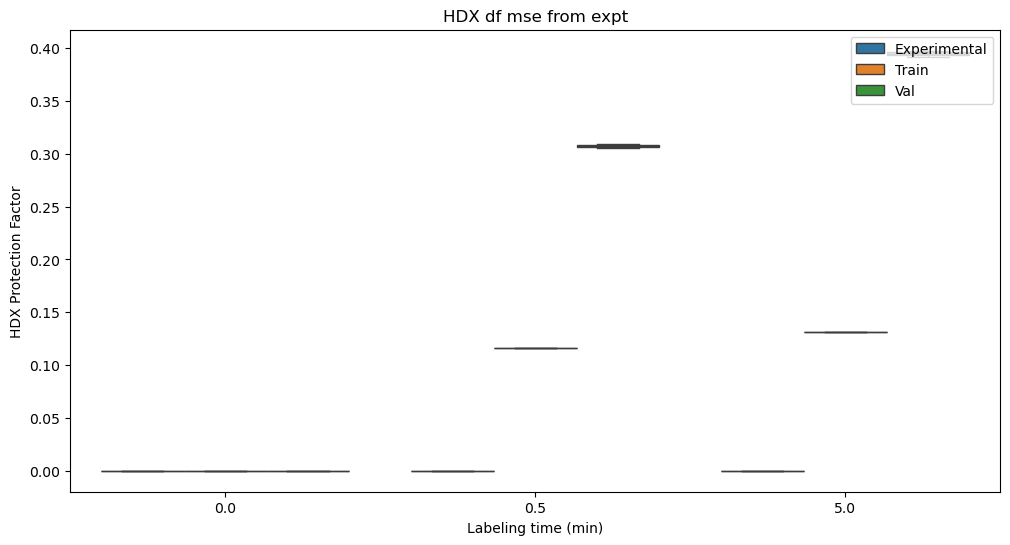

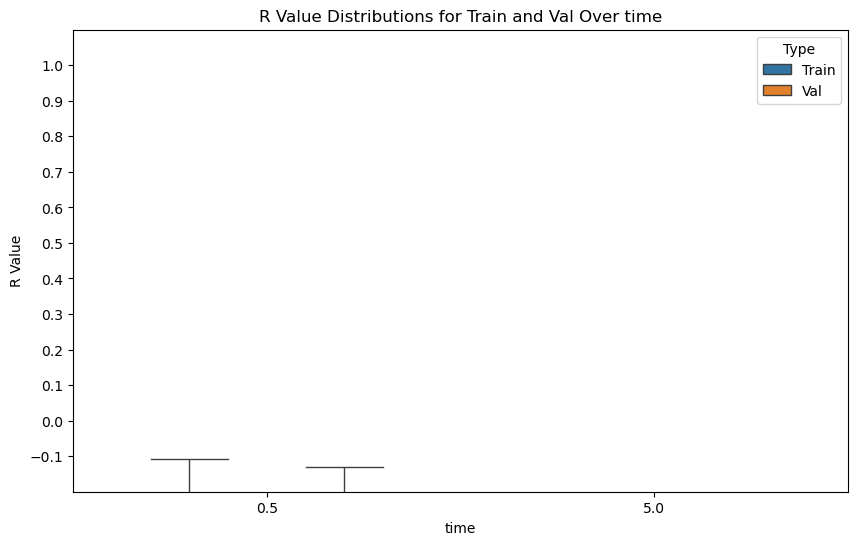

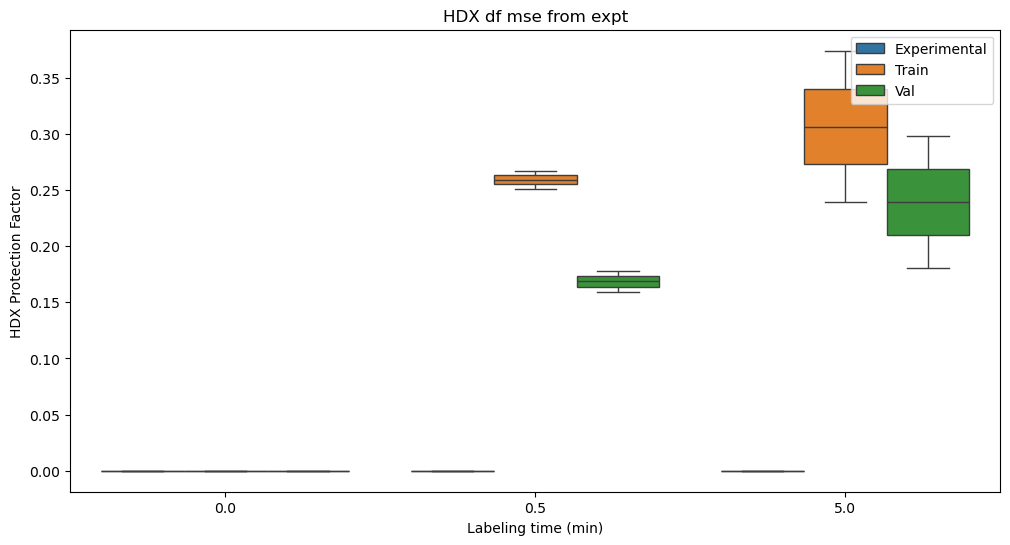

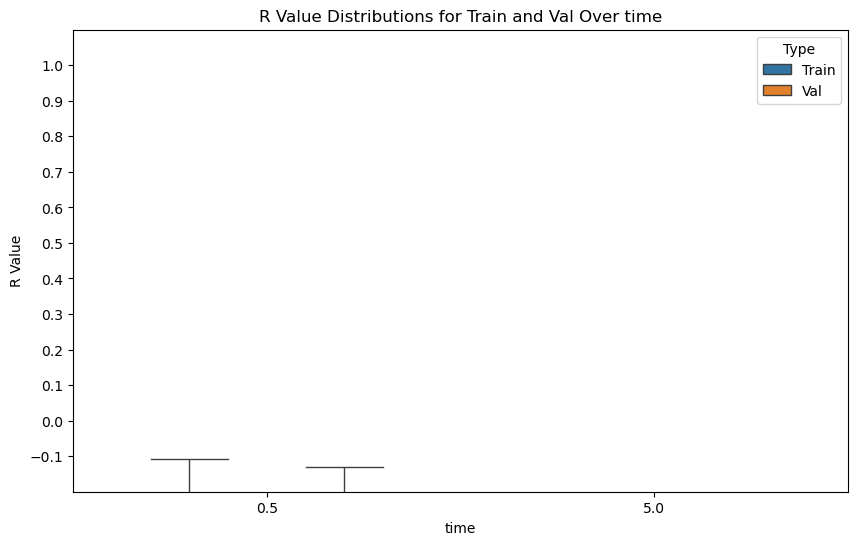

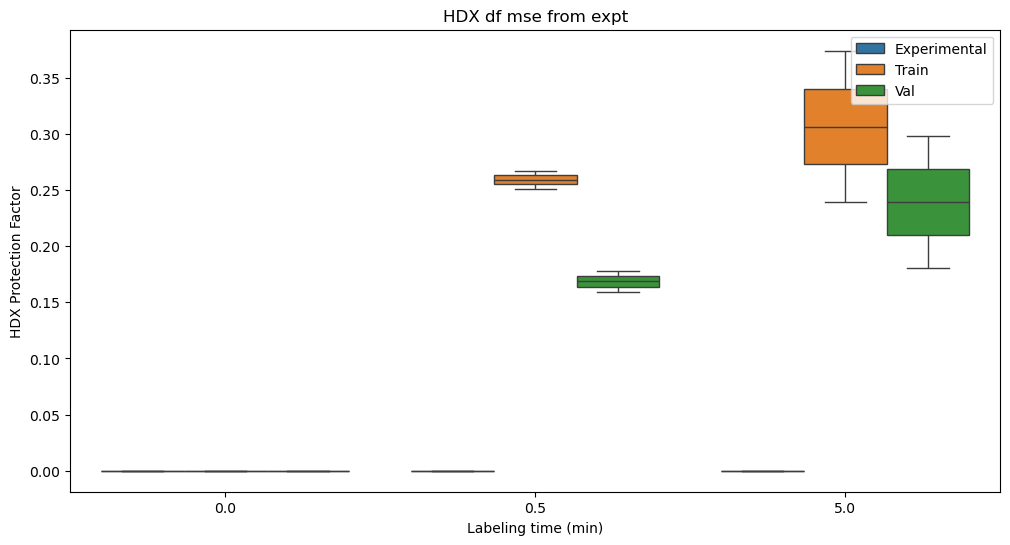

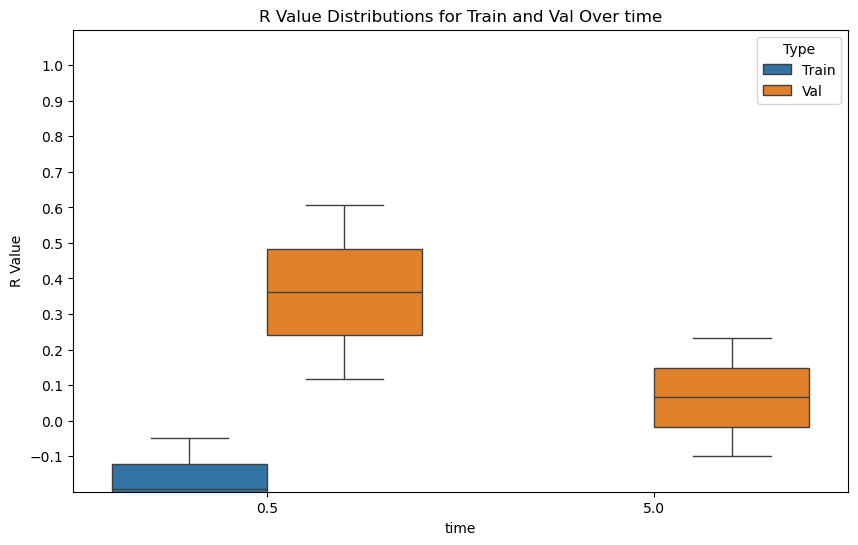

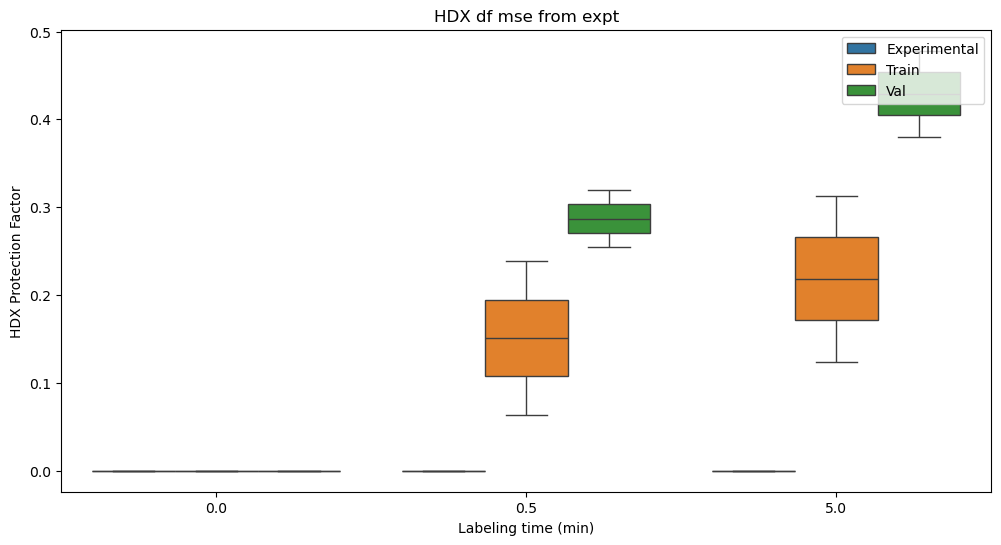

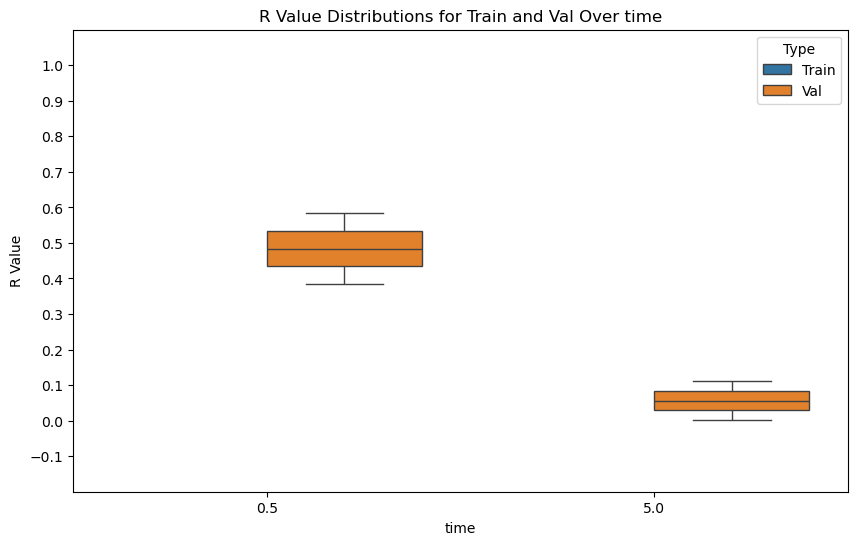

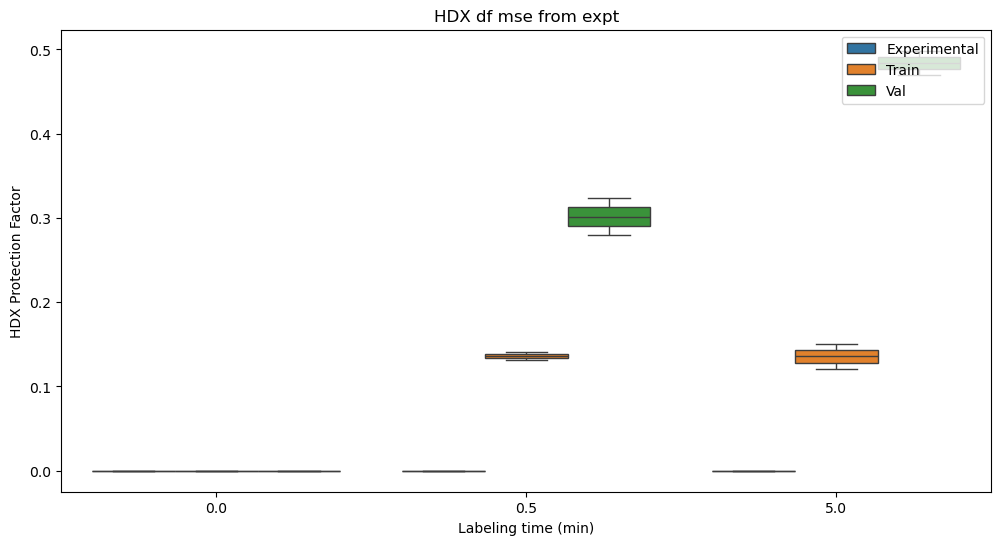

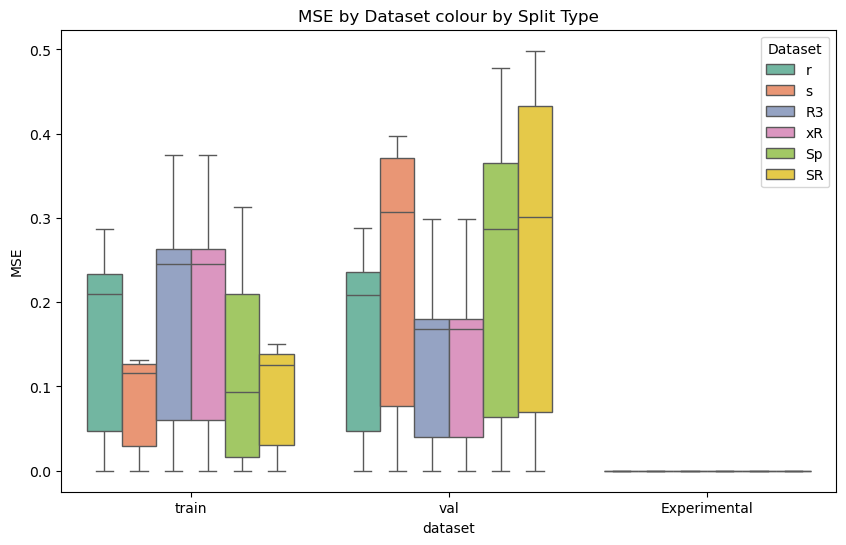

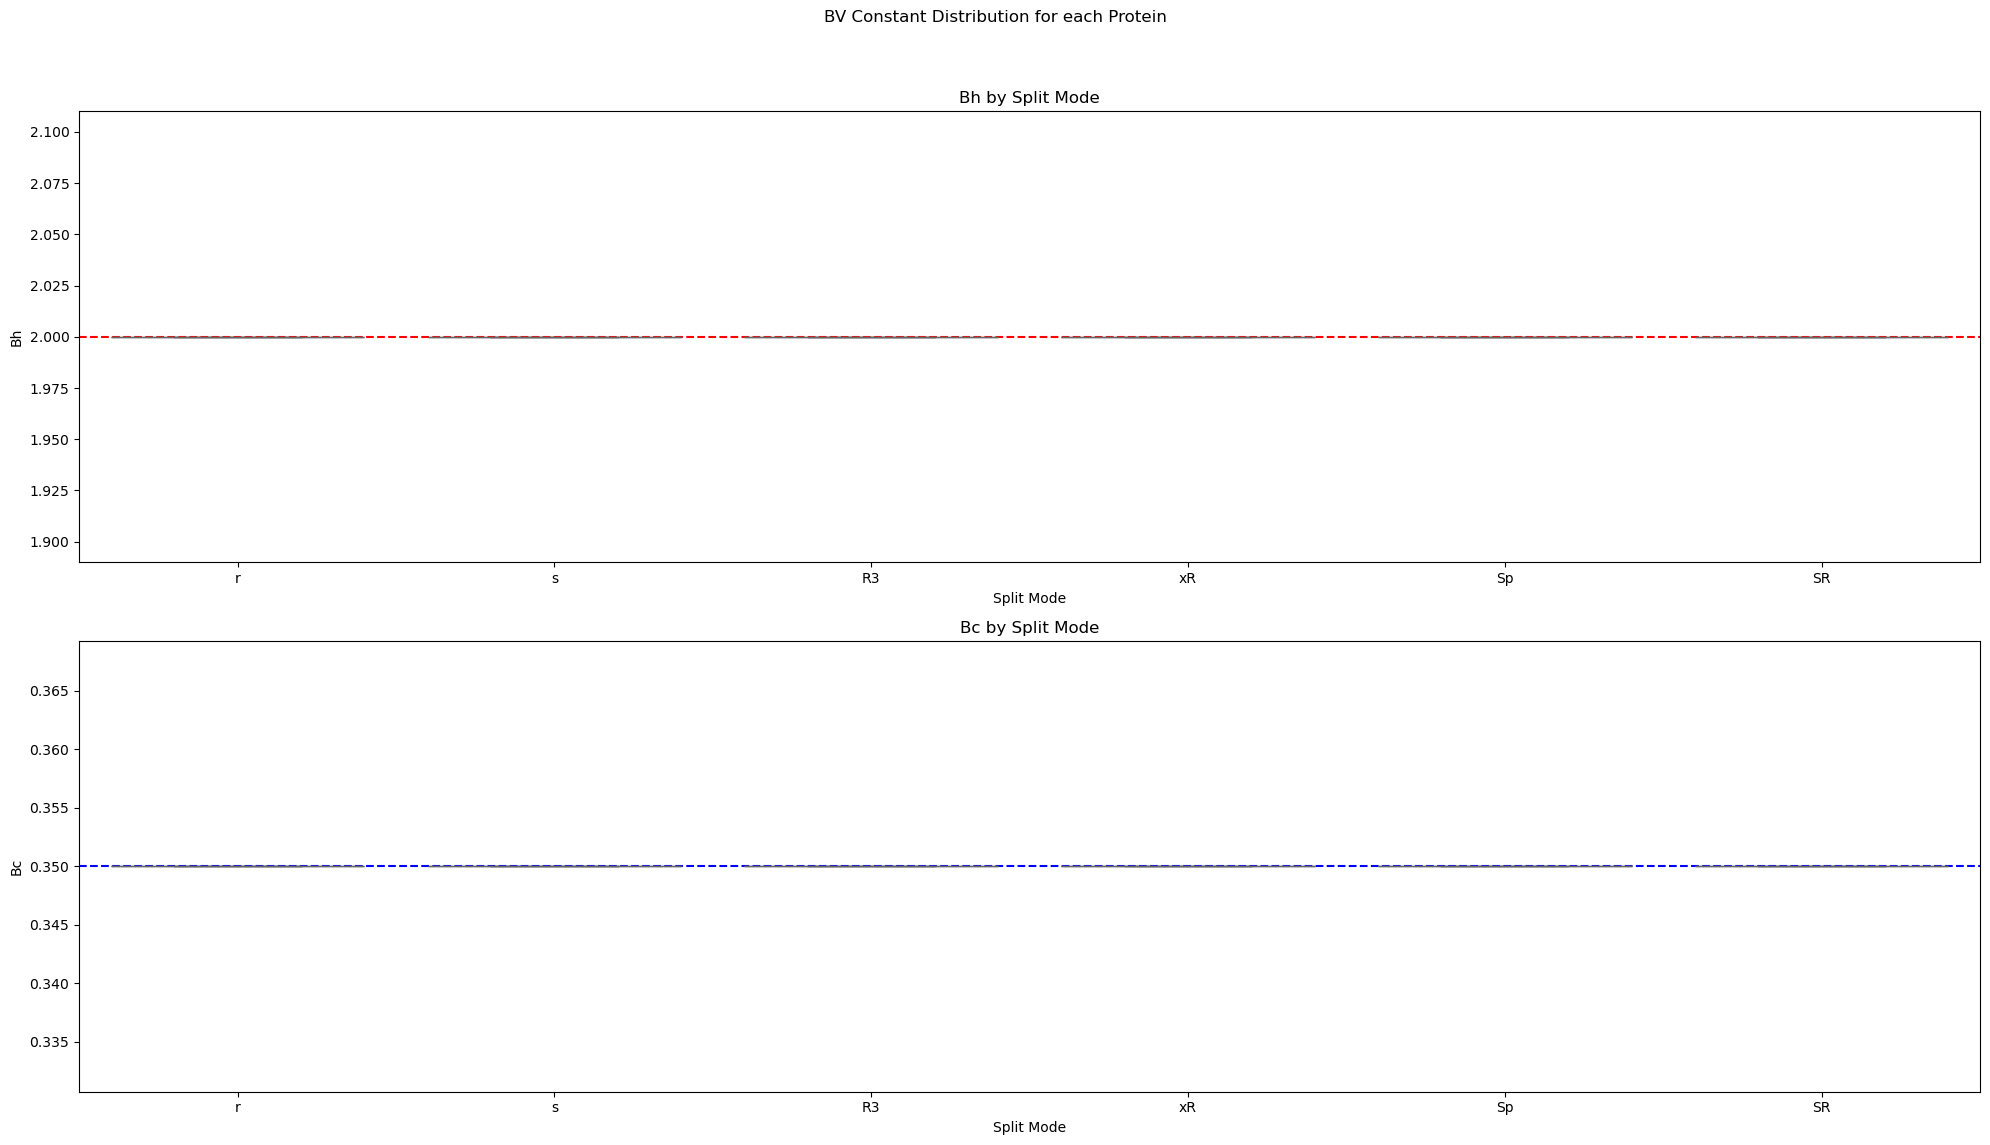

In [ ]:
combined_analysis_dump, names, save_paths = VDX.run_refine_ensemble(system=test_name,
                                                                    times=[0, 0.5, 5.0],
                                                                    expt_name=expt_name,
                                                                    n_reps=1,
                                                                    split_mode='R3',
                                                                    hdx_path=hdx_path,
                                                                    segs_path=segs_path,
                                                                    traj_paths=traj_paths,
                                                                    top_path=top_path)

In [ ]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [ ]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [ ]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [ ]:
# def run_split_test(split_mode, name, system):

#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode])
#     settings.times = [0.0, 0.5, 5.0]
#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path

In [ ]:

# splits = ['r', 'SR', 'R3']
# split_names = ['AvsB', 'LvsX', 'mixAandB']
# system = 'BPTITtut_test'

# raw_run_outputs = {}
# analysis_dumps = {}
# analysis_df = pd.DataFrame()
# names = []
# save_paths = []


# for split, split_name in zip(splits, split_names):
#     run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
#     raw_run_outputs[name] = run_outputs
#     analysis_dumps.update(analysis_dump)
#     analysis_df = pd.concat([analysis_df, df])
#     names.append(name)
#     save_paths.append(save_path)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

